In [2]:
# from scripts.als import *

# filename = '../data_store/data/sodankyla_als/lasfiles/tiffs/list5.tiff'
# # filename = '../data/sodankyla_als/lasfiles/tiffs/list30.tiff'

# data = load_raster(filename)

# data = data.where(data <= 100, drop=True)

# center_lat = 67.361833
# center_lon = 26.634154
# width=0.05
# lat_bounds = (center_lat - width, center_lat + width)
# lon_bounds = (center_lon - width / np.cos(np.radians(center_lat)), center_lon + width / np.cos(np.radians(center_lat)))

# def average_pixel_value(data_array, longitude, latitude, w):
#     # Calculate the bounding box
#     lat_min = latitude - w / 2
#     lat_max = latitude + w / 2
#     lon_min = longitude - w / (2 * np.cos(np.radians(latitude)))
#     lon_max = longitude + w / (2 * np.cos(np.radians(latitude)))

#     # data_array.plot(cmap='gray')
#     # Select the data within the bounding box
#     # print(lat_min, lat_max, lon_min, lon_max)
#     sub_data = data_array.sel(lat=slice(lat_max, lat_min), lon=slice(lon_min, lon_max))
#     # print(sub_data)
#     # sub_data.plot(cmap='Greens')

#     # Calculate the average of the valid data
#     average_value = sub_data.mean().item()

#     return average_value

# print(average_pixel_value(data, center_lon, center_lat, 0.005))

# # Plot the data
# plt.figure(figsize=(10, 8))
# plt.pcolormesh(data['lon'], data['lat'], data, cmap='Greens', vmax=100)
# plt.colorbar(label='Raster Value')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.title('Raster Data Plot')
# plt.xlim(lon_bounds)
# plt.ylim(lat_bounds)
# plt.show()

## The above is same as below, but in lat/lon

32.713016510009766


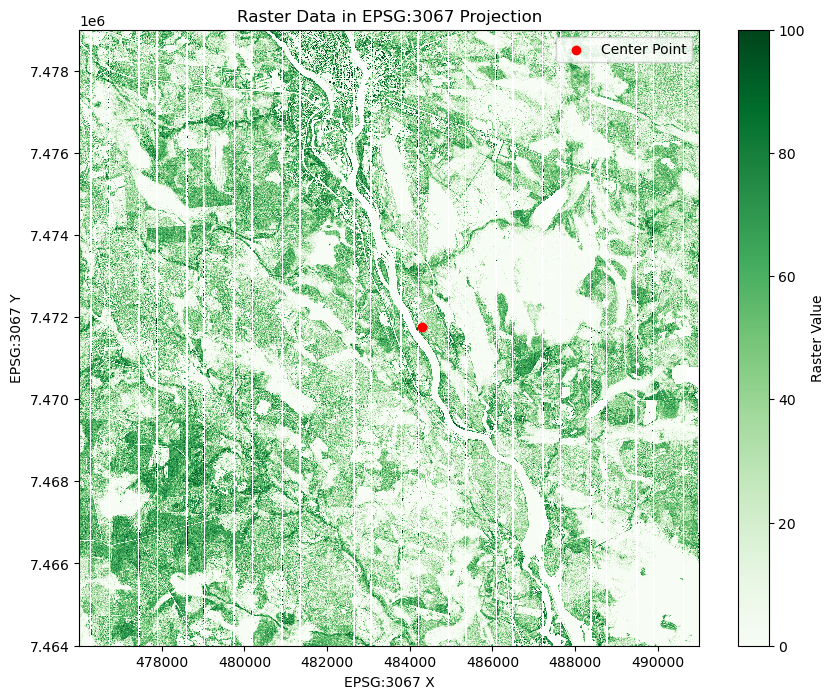

In [2]:
from scripts.als import *

filename = '../data_store/data/sodankyla_als/lasfiles/tiffs/list5.tiff'  # Replace with the path to your actual raster file

# Load the raster in EPSG:3067 projection
data, crs = load_raster(filename)

# Define the center latitude and longitude (replace with your actual values)
center_lat = 67.361833  # Example latitude
center_lon = 26.634154  # Example longitude

x, y = translate(center_lat, center_lon, crs)

# Calculate the average value within the 500m box centered at the point of interest
average_value = average_pixel_value(data, x, y, buffer_size_m=500)
print(average_value)

# Plot the data in its native EPSG:3067 projection
plt.figure(figsize=(10, 8))
plt.pcolormesh(data['x'], data['y'], data, cmap='Greens', vmax=100)
plt.colorbar(label='Raster Value')
plt.xlabel('EPSG:3067 X')
plt.ylabel('EPSG:3067 Y')
plt.title('Raster Data in EPSG:3067 Projection')

# Plot the point of interest (scatter)
plt.scatter(x, y, color='red', label='Center Point', zorder=5)
plt.legend()
plt.show()


42.5010986328125


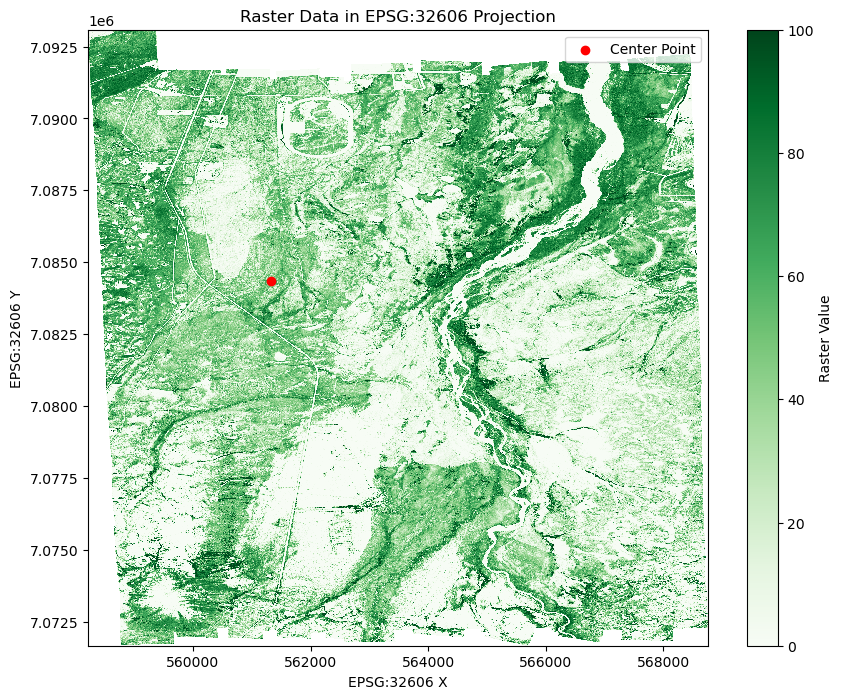

In [5]:
from scripts.als import *

filename = '../data_store/data/delta_als/NEON/cc5.tiff'  # Replace with the path to your actual raster file

# Load the raster in EPSG:3067 projection
data, crs = load_raster(filename)

# Define the center latitude and longitude (replace with your actual values)
center_lat = 63.8811  # Example latitude
center_lon = -145.7514  # Example longitude

x, y = translate(center_lat, center_lon, crs)

# Calculate the average value within the 500m box centered at the point of interest
average_value = average_pixel_value(data, x, y, buffer_size_m=500)
print(average_value)

# Plot the data in its native EPSG:3067 projection
plt.figure(figsize=(10, 8))
plt.pcolormesh(data['x'], data['y'], data, cmap='Greens', vmax=100)
plt.colorbar(label='Raster Value')
plt.xlabel('EPSG:32606 X')
plt.ylabel('EPSG:32606 Y')
plt.title('Raster Data in EPSG:32606 Projection')

# Plot the point of interest (scatter)
plt.scatter(x, y, color='red', label='Center Point', zorder=5)
plt.legend()
plt.show()


54.42668914794922


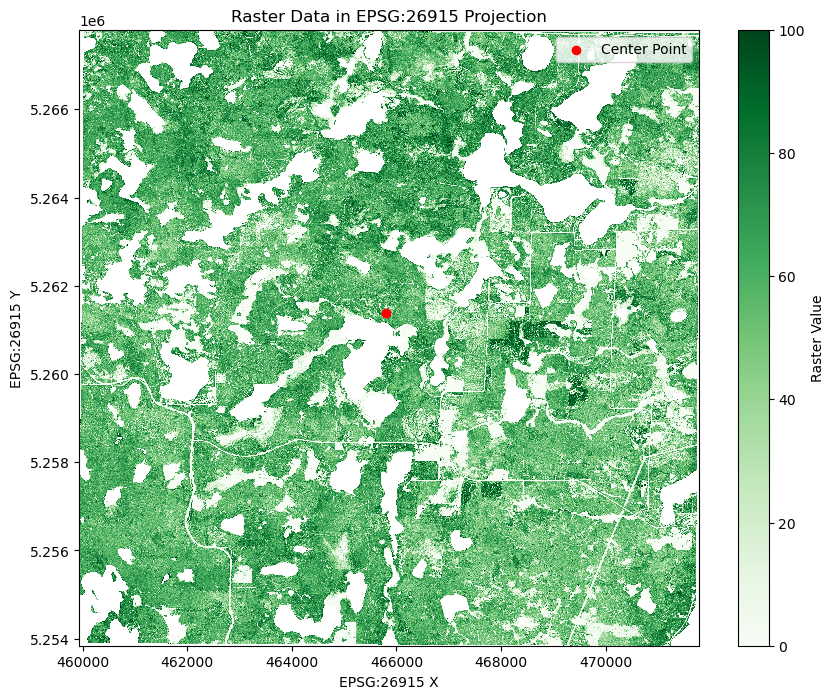

In [4]:
from scripts.als import *

filename = '../data_store/data/marcell_als/cc5.tiff'  # Replace with the path to your actual raster file

# Load the raster in EPSG:3067 projection
data, crs = load_raster(filename)

# Define the center latitude and longitude (replace with your actual values)
center_lat = 47.5049  # Example latitude
center_lon = -93.4541  # Example longitude

x, y = translate(center_lat, center_lon, crs)

# Calculate the average value within the 500m box centered at the point of interest
average_value = average_pixel_value(data, x, y, buffer_size_m=500)
print(average_value)

# Plot the data in its native EPSG:3067 projection
plt.figure(figsize=(10, 8))
plt.pcolormesh(data['x'], data['y'], data, cmap='Greens', vmax=100)
plt.colorbar(label='Raster Value')
plt.xlabel('EPSG:26915 X')
plt.ylabel('EPSG:26915 Y')
plt.title('Raster Data in EPSG:26915 Projection')

# Plot the point of interest (scatter)
plt.scatter(x, y, color='red', label='Center Point', zorder=5)
plt.legend()
plt.show()

In [3]:
from scripts.als import *

filename = '../data_store/data/marcell_als/cc5.tiff'  # Replace with the path to your actual raster file

# Load the raster in EPSG:3067 projection
data, crs = load_raster(filename)

crs

CRS.from_epsg(26915)

# canopy cover added to pickled df

In [9]:
from scripts.als import *

# df = pd.read_pickle('five_sites_data_snow_cc.pkl')
# df['cc'] = None

filename = '../data_store/data/marcell_als/cc5.tiff'
data, crs = load_raster(filename)

for index, row in df.iterrows():
    if row['camera'] == 'marcell_MN':
        x, y = translate(row['latitude'], row['longitude'], crs)
        df.at[index,'cc'] = average_pixel_value(data, center_x = x, center_y = y, buffer_size_m=500)
    else:
        continue

# df = df[df['camera'] == 'sodankyla_full']

In [12]:
# df[df['camera']=='marcell_MN']
# df.to_pickle('five_sites_data_snow_cc.pkl')

# Canopy Cover Accuracy Analysis

In [2]:
from scripts.FSC_dataframe_phoreal import *

# df.to_pickle('five_sites_5km_1kmbox.pkl')
# df_pure.to_pickle('five_sites_pure_5km.pkl')

df=pd.read_pickle('five_sites_data_snow_cc.pkl')
# df=pd.read_pickle('five_sites_5km_thresh5.pkl')
# df_pure=pd.read_pickle('five_sites_pure_10km.pkl')

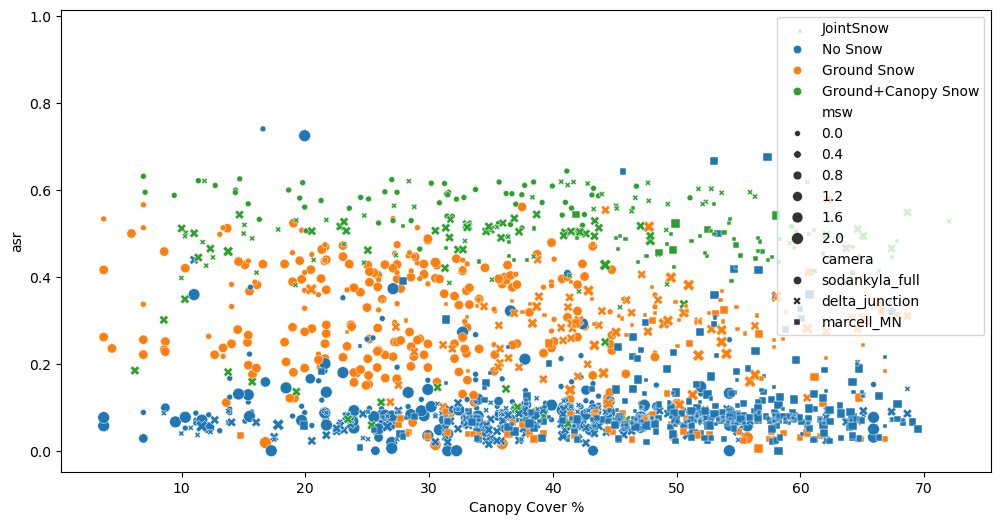

In [25]:
from scripts.hist_plot import *
from scripts.confusion import *

plt.figure(figsize=(12,6))

hue_labels = {'0.0': 'No Snow', '1.0': 'Ground Snow', '2.0': 'Ground+Canopy Snow'}

loc_df = df[(df['Confidence'] == 1)&(df['cc'] >= 0)&(df['msw'] < 2.1)].reset_index(drop=True)

scatter = sns.scatterplot(loc_df, x='cc', y='asr', size='msw', hue='JointSnow',style='camera',palette='tab10',legend='brief')

# Get the handles and labels
handles, labels = scatter.get_legend_handles_labels()

# Separate the handles and labels for hue and size legends
hue_handles = handles[:len(hue_labels) + 1]  # Including the title 'JointSnow'
hue_labels_original = labels[:len(hue_labels) + 1]  # Including the title 'JointSnow'

size_handles = handles[len(hue_labels) + 1:]  # The rest are size labels
size_labels = labels[len(hue_labels) + 1:]  # The rest are size labels

# Replace hue labels with custom labels, ignoring the first label 'JointSnow'
new_hue_labels = [hue_labels[label] if label in hue_labels else label for label in hue_labels_original]

# Combine the new hue labels with the original size labels
new_labels = new_hue_labels + size_labels

# Combine the handles
new_handles = hue_handles + size_handles

scatter.legend(handles=new_handles, labels=new_labels, loc='upper right')
plt.xlabel('Canopy Cover %')
# plt.ylim(-2.5,100)
# plt.xlim(-1,67)
# plt.savefig('./images/canopy_cover/asr_vs_canopycover_msw1.png')
plt.show()

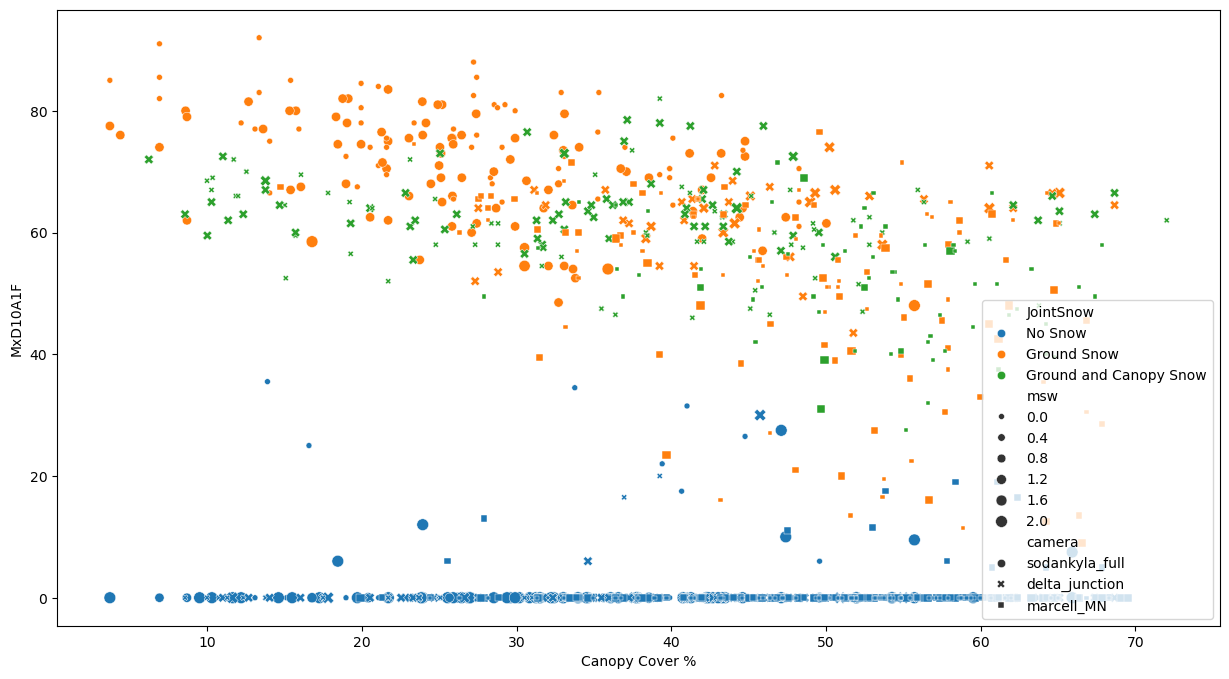

In [26]:
from scripts.hist_plot import *
from scripts.confusion import *

plt.figure(figsize=(15,8))

hue_labels = {'0.0': 'No Snow', '1.0': 'Ground Snow', '2.0': 'Ground and Canopy Snow'}

loc_df = df[(df['Confidence'] == 1)&(df['cc'] >= 0)&(df['MxD10A1F'] <= 100)&(df['msw'] < 2.1)].reset_index(drop=True)

scatter = sns.scatterplot(loc_df, x='cc', y='MxD10A1F', size='msw', hue='JointSnow',palette='tab10',style='camera',legend='brief')

# Get the handles and labels
handles, labels = scatter.get_legend_handles_labels()

# Separate the handles and labels for hue and size legends
hue_handles = handles[:len(hue_labels) + 1]  # Including the title 'JointSnow'
hue_labels_original = labels[:len(hue_labels) + 1]  # Including the title 'JointSnow'

size_handles = handles[len(hue_labels) + 1:]  # The rest are size labels
size_labels = labels[len(hue_labels) + 1:]  # The rest are size labels

# Replace hue labels with custom labels, ignoring the first label 'JointSnow'
new_hue_labels = [hue_labels[label] if label in hue_labels else label for label in hue_labels_original]

# Combine the new hue labels with the original size labels
new_labels = new_hue_labels + size_labels

# Combine the handles
new_handles = hue_handles + size_handles

scatter.legend(handles=new_handles, labels=new_labels, loc='lower right')
plt.xlabel('Canopy Cover %')
# plt.ylim(-2.5,100)
# plt.xlim(-1,67)
# plt.savefig('./images/canopy_cover/MOD10_vs_canopycover_msw2.png')
plt.show()

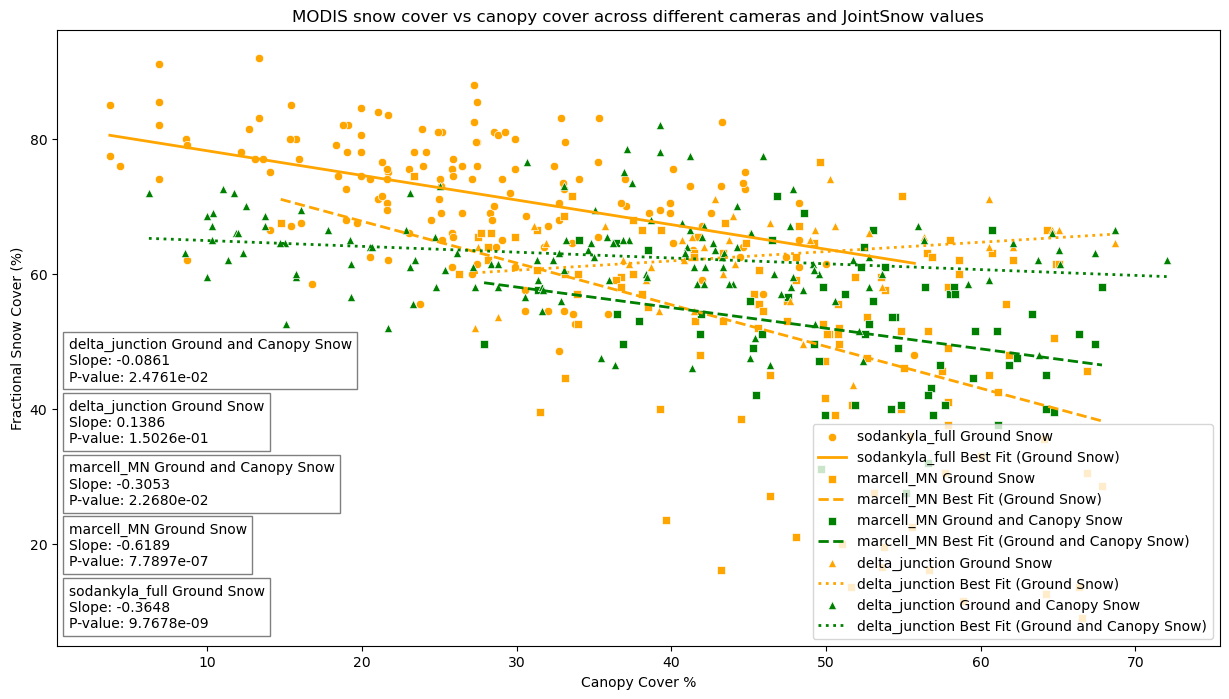

In [27]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# List of cameras and JointSnow values
cameras = ['sodankyla_full', 'marcell_MN', 'delta_junction']
joint_snow_values = [1, 2]
joint_snow_labels = {1: 'Ground Snow', 2: 'Ground and Canopy Snow'}
camera_markers = {'sodankyla_full': 'o', 'marcell_MN': 's', 'delta_junction': '^'}

loc_df = df[(df['Confidence'] == 1)&(df['cc'] >= 0)&(df['MxD10A1F'] <= 100)&(df['msw'] < 2.1)].reset_index(drop=True)

# Set up a plot with a larger size
plt.figure(figsize=(15, 8))

# Initialize a counter for the number of valid annotations
annotation_counter = 0

# Loop over each camera
for camera in cameras:
    camera_filtered_df = loc_df[loc_df['camera'] == camera]
    
    # Loop over each JointSnow value
    for joint_snow in joint_snow_values:
        # Filter the data for the current JointSnow value
        snow_df_filtered = camera_filtered_df[camera_filtered_df['JointSnow'] == joint_snow]
        X = snow_df_filtered['cc'].astype(float).values  # Canopy Cover %
        y = snow_df_filtered['MxD10A1F'].astype(float).values  # MxD10A1F

        # Check for NaN or infinite values and remove them
        mask = np.isfinite(X) & np.isfinite(y)
        X = X[mask].reshape(-1, 1)
        y = y[mask]

        # Continue only if there's data to process
        if X.size > 0 and y.size > 0:
            # Add a constant (intercept) to the model
            X_with_const = sm.add_constant(X)

            # Fit the model using statsmodels
            model = sm.OLS(y, X_with_const)
            results = model.fit()

            # Get the slope and p-value
            slope = results.params[1]
            p_value = results.pvalues[1]

            # Define colors and line styles based on JointSnow and camera
            color = 'orange' if joint_snow == 1 else 'green'
            line_style = '-' if camera == 'sodankyla_full' else '--' if camera == 'marcell_MN' else ':'
            marker = camera_markers[camera]

            # Plot the scatter plot with different markers
            sns.scatterplot(data=snow_df_filtered, x='cc', y='MxD10A1F', color=color, marker=marker, label=f'{camera} {joint_snow_labels[joint_snow]}')

            # Plot the line of best fit
            x_vals = np.linspace(X.min(), X.max(), 100)
            y_vals = results.predict(sm.add_constant(x_vals.reshape(-1, 1)))
            plt.plot(x_vals, y_vals, color=color, linestyle=line_style, linewidth=2, label=f'{camera} Best Fit ({joint_snow_labels[joint_snow]})')

            # Calculate vertical position for text annotation to avoid overlap
            text_y_position = 0.025 + 0.1 * annotation_counter  # Moved down and increased separation
            
            # Add slope and p-value to the plot for the current line, including the camera and JointSnow description
            plt.text(0.01, text_y_position,  # Moved slightly more left
                     f"{camera} {joint_snow_labels[joint_snow]}\nSlope: {slope:.4f}\nP-value: {p_value:.4e}", 
                     horizontalalignment='left', verticalalignment='bottom', transform=plt.gca().transAxes, 
                     fontsize=10, bbox=dict(facecolor='white', alpha=0.5))  # Shrunk the font

            # Increment the annotation counter
            annotation_counter += 1

# Customize and show the plot
plt.xlabel('Canopy Cover %')
plt.ylabel('MxD10A1F')
plt.legend(loc='lower right')
plt.title('MODIS snow cover vs canopy cover across different cameras and JointSnow values')
plt.ylabel('Fractional Snow Cover (%)')
# plt.savefig('./images/canopy_cover_statistically_significant_msw2.png')
plt.show()


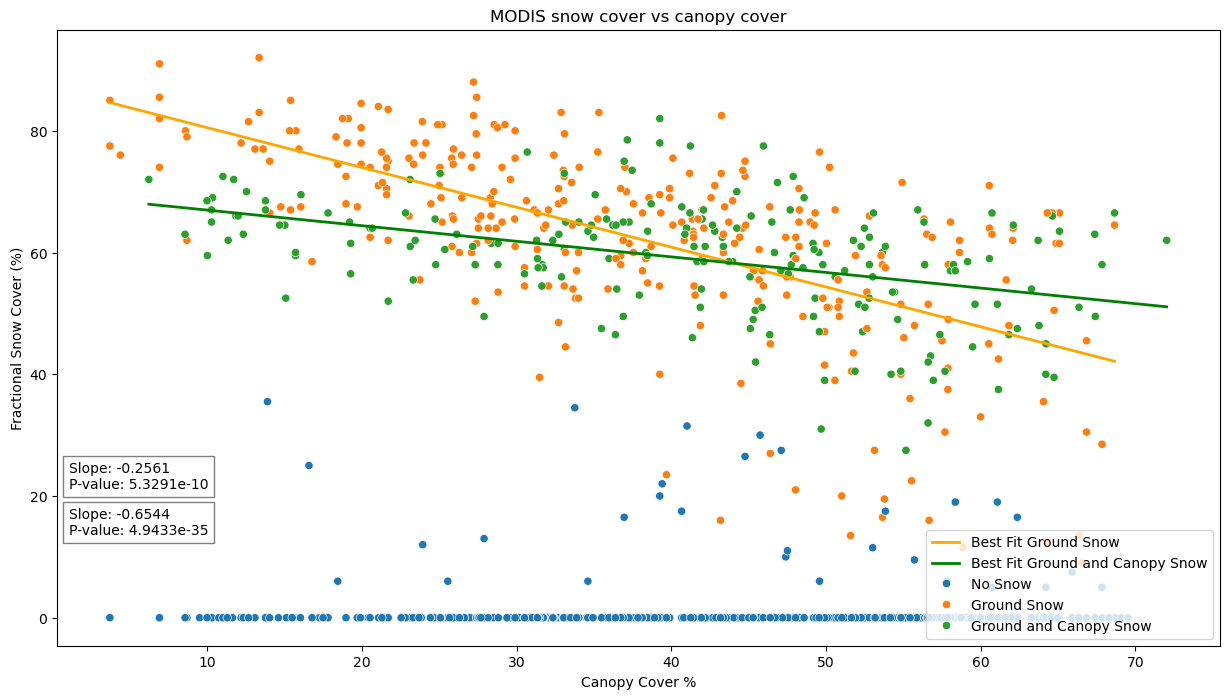

In [28]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the data (both JointSnow = 0 and JointSnow = 1)
plt.figure(figsize=(15, 8))
colors = ['orange','green']
labels = ['Ground Snow', 'Ground and Canopy Snow']

loc_df = df[(df['Confidence'] == 1)&(df['cc'] >= 0)&(df['MxD10A1F'] <= 100)&(df['msw'] < 2.1)].reset_index(drop=True)

for i in [1,2]:

    # Prepare the data for linear regression only for JointSnow = 1
    snow_df_filtered = loc_df[loc_df['JointSnow'] == i]  # Filter for snow data
    X = snow_df_filtered['cc'].astype(float).values  # Canopy Cover %
    y = snow_df_filtered['MxD10A1F'].astype(float).values  # MxD10A1F
    
    # Check for NaN or infinite values and remove them
    mask = np.isfinite(X) & np.isfinite(y)
    X = X[mask].reshape(-1, 1)
    y = y[mask]
    
    # Add a constant (intercept) to the model
    X_with_const = sm.add_constant(X)
    
    # Fit the model using statsmodels
    model = sm.OLS(y, X_with_const)
    results = model.fit()
    
    # Get the slope (coefficient for 'cc') and its p-value
    slope = results.params[1]
    p_value = results.pvalues[1]
    
    # # Print the results
    # print(f"Slope: {slope}")
    # print(f"P-value for slope: {p_value:.4e}")  # Print p-value in scientific notation


    # Plot the line of best fit for the Snow data (JointSnow = 1)
    x_vals = np.linspace(X.min(), X.max(), 100)
    y_vals = results.predict(sm.add_constant(x_vals.reshape(-1, 1)))
    plt.plot(x_vals, y_vals, color=colors[i-1], linewidth=2, label=f'Best Fit {labels[i-1]}')

    # Add slope and p-value to the plot in scientific notation
    plt.text(0.01, 0.2+.075*(i-1), f"Slope: {slope:.4f}\nP-value: {p_value:.4e}", 
             horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes, 
             fontsize=10, bbox=dict(facecolor='white', alpha=0.5))


scatter = sns.scatterplot(data=loc_df, x='cc', y='MxD10A1F', hue='JointSnow', palette='tab10', legend='brief')

# Update the legend labels
hue_labels = {'0.0': 'No Snow', '1.0': 'Ground Snow', '2.0': 'Ground and Canopy Snow'}  # Note keys are strings for exact matching
handles, labels = scatter.get_legend_handles_labels()

# Update legend labels based on the hue_labels dictionary
new_labels = [hue_labels.get(label, label) for label in labels]

plt.legend(handles=handles, labels=new_labels, loc='lower right')

# Customize and show the plot
plt.xlabel('Canopy Cover %')
plt.ylabel('MxD10A1F')

plt.title('MODIS snow cover vs canopy cover')
plt.ylabel('Fractional Snow Cover (%)')
# plt.savefig('./images/canopy_cover_statistically_significant_all_msw2.png')
plt.show()


# Same thing as above but gapped

In [1]:
from scripts.FSC_dataframe_phoreal import *

# df.to_pickle('five_sites_5km_1kmbox.pkl')
# df_pure.to_pickle('five_sites_pure_5km.pkl')

df=pd.read_pickle('five_sites_data_gapped.pkl')
# df=pd.read_pickle('five_sites_5km_thresh5.pkl')
# df_pure=pd.read_pickle('five_sites_pure_10km.pkl')

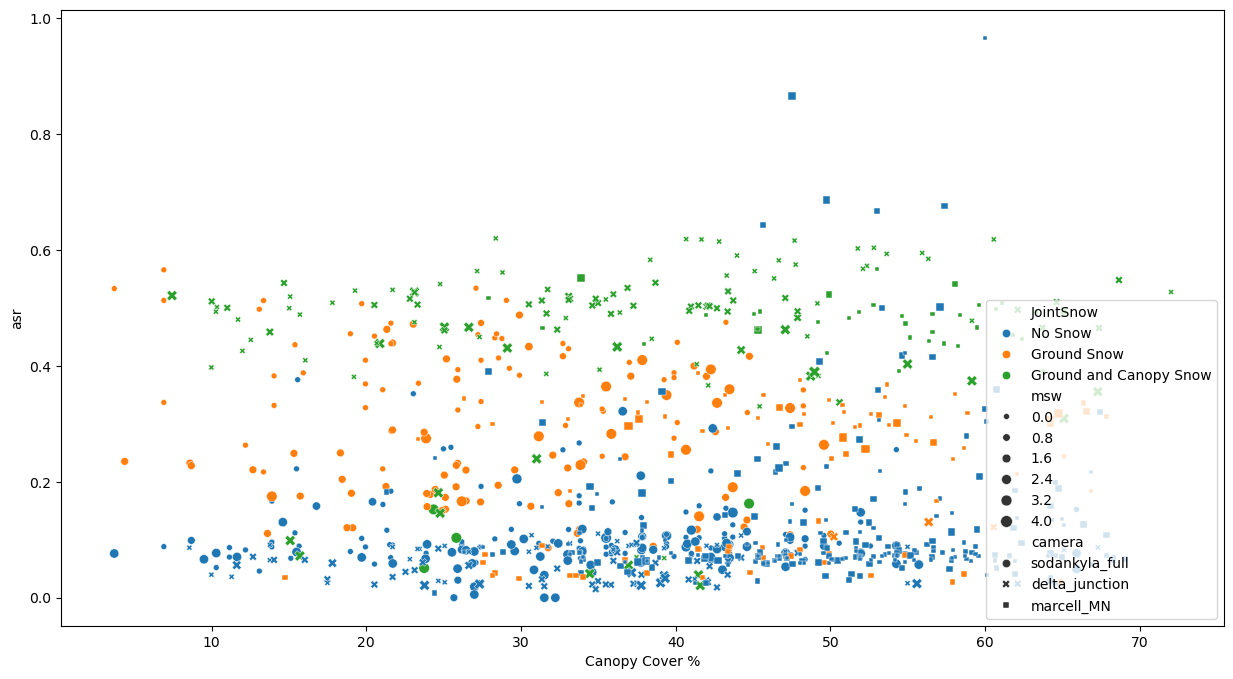

In [10]:
from scripts.hist_plot import *
from scripts.confusion import *

plt.figure(figsize=(15,8))

hue_labels = {'0.0': 'No Snow', '1.0': 'Ground Snow', '2.0': 'Ground and Canopy Snow'}

loc_df = df[(df['Confidence'] == 1)&(df['cc'] >= 0)&(df['MxD10A1'] <= 100)&(df['msw'] < 5.1)].reset_index(drop=True)

scatter = sns.scatterplot(loc_df, x='cc', y='asr', size='msw', hue='JointSnow',palette='tab10',style='camera',legend='brief')

# Get the handles and labels
handles, labels = scatter.get_legend_handles_labels()

# Separate the handles and labels for hue and size legends
hue_handles = handles[:len(hue_labels) + 1]  # Including the title 'JointSnow'
hue_labels_original = labels[:len(hue_labels) + 1]  # Including the title 'JointSnow'

size_handles = handles[len(hue_labels) + 1:]  # The rest are size labels
size_labels = labels[len(hue_labels) + 1:]  # The rest are size labels

# Replace hue labels with custom labels, ignoring the first label 'JointSnow'
new_hue_labels = [hue_labels[label] if label in hue_labels else label for label in hue_labels_original]

# Combine the new hue labels with the original size labels
new_labels = new_hue_labels + size_labels

# Combine the handles
new_handles = hue_handles + size_handles

scatter.legend(handles=new_handles, labels=new_labels, loc='lower right')
plt.xlabel('Canopy Cover %')
# plt.ylim(-2.5,100)
# plt.xlim(-1,67)
# plt.savefig('./images/canopy_cover/gapped_MOD10_vs_canopycover_msw2.png')
plt.show()

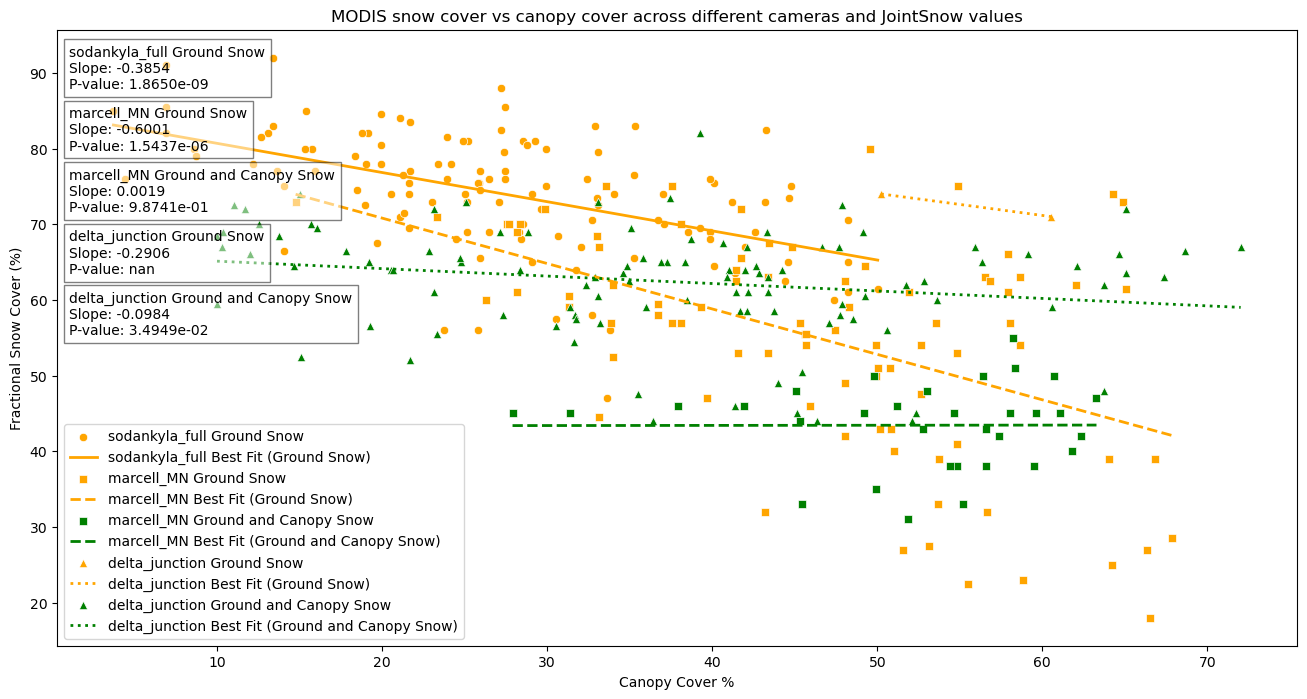

In [11]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

loc_df = df[(df['Confidence'] == 1)&(df['cc'] >= 0)&(df['MxD10A1'] <= 100)&(df['msw'] < 2.1)].reset_index(drop=True)

# List of cameras and JointSnow values
cameras = ['sodankyla_full', 'marcell_MN', 'delta_junction']
joint_snow_values = [1, 2]
joint_snow_labels = {1: 'Ground Snow', 2: 'Ground and Canopy Snow'}
camera_markers = {'sodankyla_full': 'o', 'marcell_MN': 's', 'delta_junction': '^'}

# Set up a plot with a larger size
plt.figure(figsize=(16, 8))

# Initialize a counter for the number of valid annotations
annotation_counter = 0

# Loop over each camera
for camera in cameras:
    camera_filtered_df = loc_df[loc_df['camera'] == camera]
    
    # Loop over each JointSnow value
    for joint_snow in joint_snow_values:
        # Filter the data for the current JointSnow value
        snow_df_filtered = camera_filtered_df[camera_filtered_df['JointSnow'] == joint_snow]
        X = snow_df_filtered['cc'].astype(float).values  # Canopy Cover %
        y = snow_df_filtered['MxD10A1'].astype(float).values  # MxD10A1F

        # Check for NaN or infinite values and remove them
        mask = np.isfinite(X) & np.isfinite(y)
        X = X[mask].reshape(-1, 1)
        y = y[mask]

        # Continue only if there's data to process
        if X.size > 0 and y.size > 0:
            # Add a constant (intercept) to the model
            X_with_const = sm.add_constant(X)

            # Fit the model using statsmodels
            model = sm.OLS(y, X_with_const)
            results = model.fit()

            # Get the slope and p-value
            slope = results.params[1]
            p_value = results.pvalues[1]

            # Define colors and line styles based on JointSnow and camera
            color = 'orange' if joint_snow == 1 else 'green'
            line_style = '-' if camera == 'sodankyla_full' else '--' if camera == 'marcell_MN' else ':'
            marker = camera_markers[camera]

            # Plot the scatter plot with different markers
            sns.scatterplot(data=snow_df_filtered, x='cc', y='MxD10A1', color=color, marker=marker, label=f'{camera} {joint_snow_labels[joint_snow]}')

            # Plot the line of best fit
            x_vals = np.linspace(X.min(), X.max(), 100)
            y_vals = results.predict(sm.add_constant(x_vals.reshape(-1, 1)))
            plt.plot(x_vals, y_vals, color=color, linestyle=line_style, linewidth=2, label=f'{camera} Best Fit ({joint_snow_labels[joint_snow]})')

            # Calculate vertical position for text annotation to avoid overlap
            text_y_position = 0.9 - 0.1 * annotation_counter  # Moved down and increased separation
            
            # Add slope and p-value to the plot for the current line, including the camera and JointSnow description
            plt.text(0.01, text_y_position,  # Moved slightly more left
                     f"{camera} {joint_snow_labels[joint_snow]}\nSlope: {slope:.4f}\nP-value: {p_value:.4e}", 
                     horizontalalignment='left', verticalalignment='bottom', transform=plt.gca().transAxes, 
                     fontsize=10, bbox=dict(facecolor='white', alpha=0.5))  # Shrunk the font

            # Increment the annotation counter
            annotation_counter += 1

# Customize and show the plot
plt.xlabel('Canopy Cover %')
plt.ylabel('MxD10A1F')
# plt.plot([0,75],[0,0],'k--')
# plt.ylim(-40,100)
plt.legend(loc='lower left')
plt.title('MODIS snow cover vs canopy cover across different cameras and JointSnow values')
plt.ylabel('Fractional Snow Cover (%)')
# plt.savefig('./images/gapped_canopy_cover_statistically_significant_msw2.png')
plt.show()


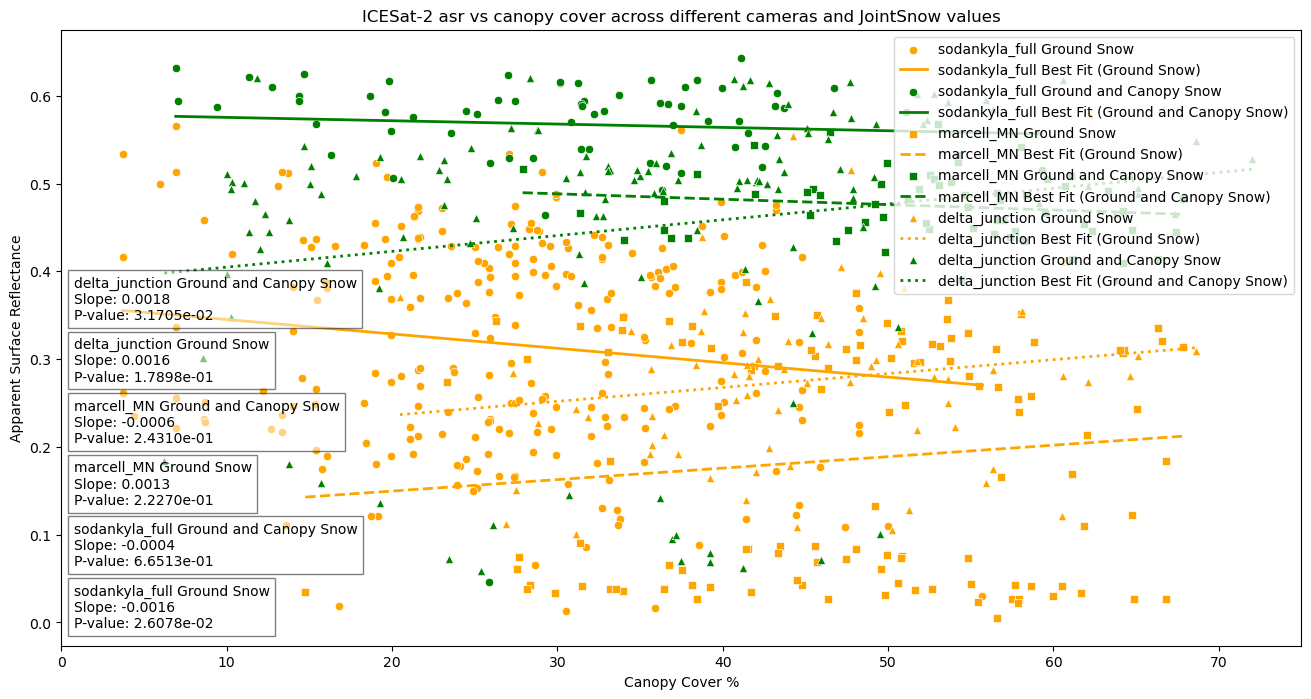

In [7]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

loc_df = df[(df['Confidence'] == 1)&(df['cc'] >= 0)&(df['msw'] < 2.1)].reset_index(drop=True)

# List of cameras and JointSnow values
cameras = ['sodankyla_full', 'marcell_MN', 'delta_junction']
joint_snow_values = [1, 2]
joint_snow_labels = {1: 'Ground Snow', 2: 'Ground and Canopy Snow'}
camera_markers = {'sodankyla_full': 'o', 'marcell_MN': 's', 'delta_junction': '^'}

# Set up a plot with a larger size
plt.figure(figsize=(16, 8))

# Initialize a counter for the number of valid annotations
annotation_counter = 0

# Loop over each camera
for camera in cameras:
    camera_filtered_df = loc_df[loc_df['camera'] == camera]
    
    # Loop over each JointSnow value
    for joint_snow in joint_snow_values:
        # Filter the data for the current JointSnow value
        snow_df_filtered = camera_filtered_df[camera_filtered_df['JointSnow'] == joint_snow]
        X = snow_df_filtered['cc'].astype(float).values  # Canopy Cover %
        y = snow_df_filtered['asr'].astype(float).values  # MxD10A1F

        # Check for NaN or infinite values and remove them
        mask = np.isfinite(X) & np.isfinite(y)
        X = X[mask].reshape(-1, 1)
        y = y[mask]

        # Continue only if there's data to process
        if X.size > 0 and y.size > 0:
            # Add a constant (intercept) to the model
            X_with_const = sm.add_constant(X)

            # Fit the model using statsmodels
            model = sm.OLS(y, X_with_const)
            results = model.fit()

            # Get the slope and p-value
            slope = results.params[1]
            p_value = results.pvalues[1]

            # Define colors and line styles based on JointSnow and camera
            color = 'orange' if joint_snow == 1 else 'green'
            line_style = '-' if camera == 'sodankyla_full' else '--' if camera == 'marcell_MN' else ':'
            marker = camera_markers[camera]

            # Plot the scatter plot with different markers
            sns.scatterplot(data=snow_df_filtered, x='cc', y='asr', color=color, marker=marker, label=f'{camera} {joint_snow_labels[joint_snow]}')

            # Plot the line of best fit
            x_vals = np.linspace(X.min(), X.max(), 100)
            y_vals = results.predict(sm.add_constant(x_vals.reshape(-1, 1)))
            plt.plot(x_vals, y_vals, color=color, linestyle=line_style, linewidth=2, label=f'{camera} Best Fit ({joint_snow_labels[joint_snow]})')

            # Calculate vertical position for text annotation to avoid overlap
            text_y_position = 0.025 + 0.1 * annotation_counter  # Moved down and increased separation
            
            # Add slope and p-value to the plot for the current line, including the camera and JointSnow description
            plt.text(0.01, text_y_position,  # Moved slightly more left
                     f"{camera} {joint_snow_labels[joint_snow]}\nSlope: {slope:.4f}\nP-value: {p_value:.4e}", 
                     horizontalalignment='left', verticalalignment='bottom', transform=plt.gca().transAxes, 
                     fontsize=10, bbox=dict(facecolor='white', alpha=0.5))  # Shrunk the font

            # Increment the annotation counter
            annotation_counter += 1

# Customize and show the plot
plt.xlabel('Canopy Cover %')
# plt.xlim(0,100)
plt.legend(loc='upper right')
plt.title('ICESat-2 asr vs canopy cover across different cameras and JointSnow values')
plt.ylabel('Apparent Surface Reflectance')
# plt.savefig('./images/gapped_canopy_cover_statistically_significant_msw2.png')
plt.show()


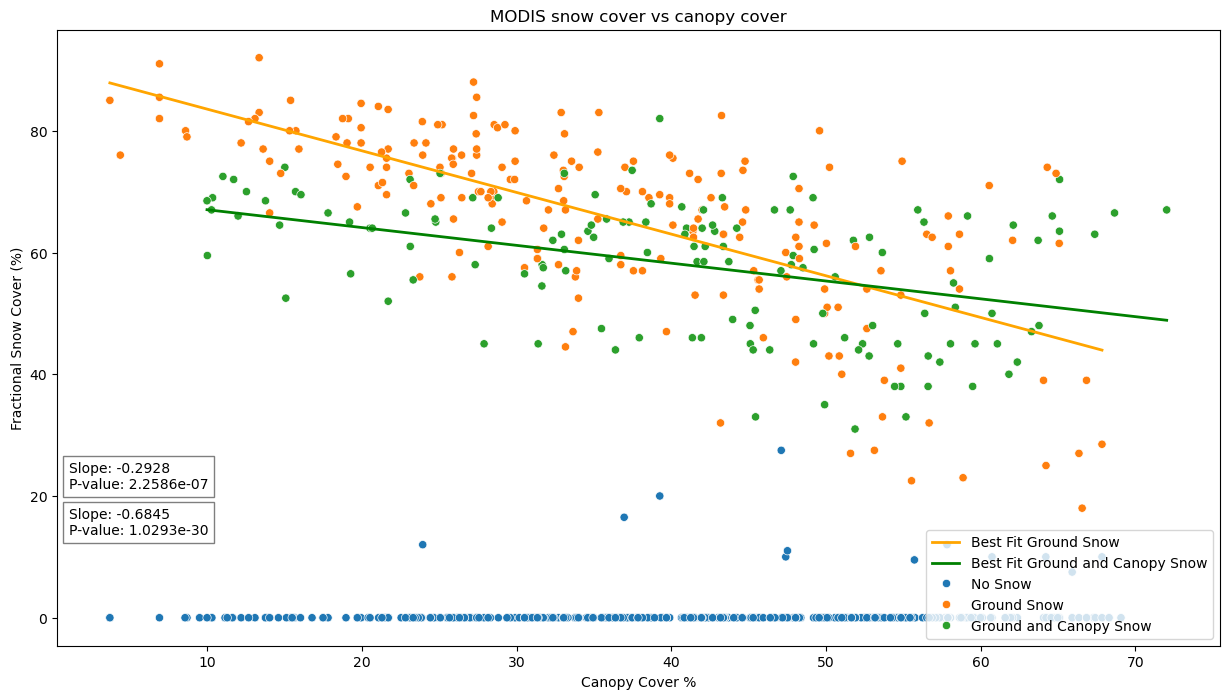

In [37]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the data (both JointSnow = 0 and JointSnow = 1)
plt.figure(figsize=(15, 8))
colors = ['orange','green']
labels = ['Ground Snow', 'Ground and Canopy Snow']

for i in [1,2]:

    # Prepare the data for linear regression only for JointSnow = 1
    snow_df_filtered = loc_df[loc_df['JointSnow'] == i]  # Filter for snow data
    X = snow_df_filtered['cc'].astype(float).values  # Canopy Cover %
    y = snow_df_filtered['MxD10A1'].astype(float).values  # MxD10A1F
    
    # Check for NaN or infinite values and remove them
    mask = np.isfinite(X) & np.isfinite(y)
    X = X[mask].reshape(-1, 1)
    y = y[mask]
    
    # Add a constant (intercept) to the model
    X_with_const = sm.add_constant(X)
    
    # Fit the model using statsmodels
    model = sm.OLS(y, X_with_const)
    results = model.fit()
    
    # Get the slope (coefficient for 'cc') and its p-value
    slope = results.params[1]
    p_value = results.pvalues[1]
    
    # # Print the results
    # print(f"Slope: {slope}")
    # print(f"P-value for slope: {p_value:.4e}")  # Print p-value in scientific notation


    # Plot the line of best fit for the Snow data (JointSnow = 1)
    x_vals = np.linspace(X.min(), X.max(), 100)
    y_vals = results.predict(sm.add_constant(x_vals.reshape(-1, 1)))
    plt.plot(x_vals, y_vals, color=colors[i-1], linewidth=2, label=f'Best Fit {labels[i-1]}')

    # Add slope and p-value to the plot in scientific notation
    plt.text(0.01, 0.2+.075*(i-1), f"Slope: {slope:.4f}\nP-value: {p_value:.4e}", 
             horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes, 
             fontsize=10, bbox=dict(facecolor='white', alpha=0.5))


scatter = sns.scatterplot(data=loc_df, x='cc', y='MxD10A1', hue='JointSnow', palette='tab10', legend='brief')

# Update the legend labels
hue_labels = {'0.0': 'No Snow', '1.0': 'Ground Snow', '2.0': 'Ground and Canopy Snow'}  # Note keys are strings for exact matching
handles, labels = scatter.get_legend_handles_labels()

# Update legend labels based on the hue_labels dictionary
new_labels = [hue_labels.get(label, label) for label in labels]

plt.legend(handles=handles, labels=new_labels, loc='lower right')

# Customize and show the plot
plt.xlabel('Canopy Cover %')
plt.ylabel('MxD10A1F')

plt.title('MODIS snow cover vs canopy cover')
plt.ylabel('Fractional Snow Cover (%)')
# plt.savefig('./images/gapped_canopy_cover_statistically_significant_all_msw2.png')
plt.show()


# what about including n_photons

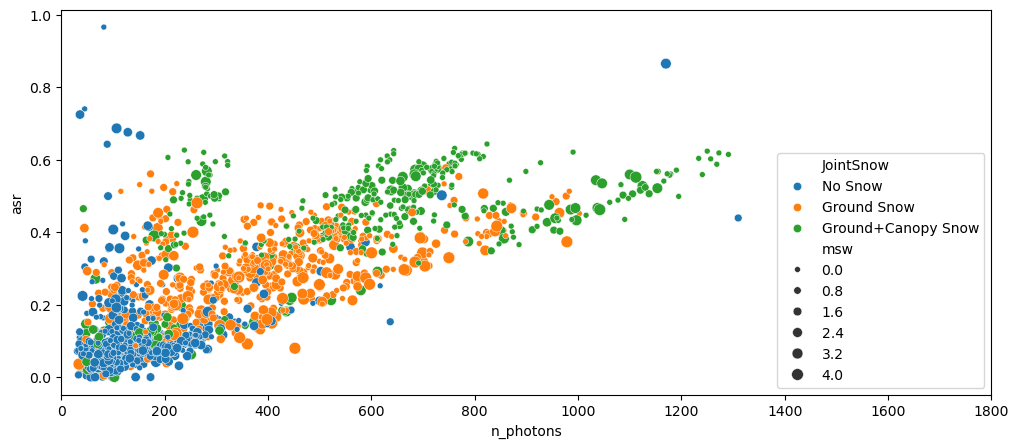

In [21]:
from scripts.hist_plot import *
from scripts.confusion import *

df=pd.read_pickle('five_sites_data_snow_cc.pkl')

plt.figure(figsize=(12,5))

hue_labels = {'0.0': 'No Snow', '1.0': 'Ground Snow', '2.0': 'Ground+Canopy Snow'}

loc_df = df[(df['Confidence'] == 1)].reset_index(drop=True)
# loc_df = df[(df['Confidence'] == 1)].reset_index(drop=True)

scatter = sns.scatterplot(data=loc_df, x='n_photons', y='asr', size='msw', hue='JointSnow', palette='tab10', legend='brief')

# Get the handles and labels
handles, labels = scatter.get_legend_handles_labels()

# Separate the handles and labels for hue and size legends
hue_handles = handles[:len(hue_labels) + 1]  # Including the title 'JointSnow'
hue_labels_original = labels[:len(hue_labels) + 1]  # Including the title 'JointSnow'

size_handles = handles[len(hue_labels) + 1:]  # The rest are size labels
size_labels = labels[len(hue_labels) + 1:]  # The rest are size labels

# Replace hue labels with custom labels, ignoring the first label 'JointSnow'
new_hue_labels = [hue_labels[label] if label in hue_labels else label for label in hue_labels_original]

# Combine the new hue labels with the original size labels
new_labels = new_hue_labels + size_labels

# Combine the handles
new_handles = hue_handles + size_handles

# Apply the new labels to the legend
scatter.legend(handles=new_handles, labels=new_labels, loc='lower right')

plt.xlabel('n_photons')
# plt.ylim(-.2,1.0)
plt.xlim(0,1800)
# plt.savefig('./images/n_photons/n_photons_vs_asr')
plt.show()


In [22]:
# from scripts.hist_plot import *
# from scripts.confusion import *

# df=pd.read_pickle('five_sites_0-05_0-005box_n_photons_snowreffed.pkl')

# hue_labels = {'0.0': 'No Snow', '1.0': 'Ground Snow', '2.0': 'Ground+Canopy Snow'}

# # accuracy = []

# for i in np.arange(0,1201,100):
#     # loc_df = df[(df['cc'] < canopy[i+1])&(df['cc'] >= canopy[i])].reset_index(drop=True)
#     print((i,i+100))
#     loc_df = df[(df['Confidence'] == 1)&(df['n_photons'] > i)&(df['n_photons'] <= i+100)].reset_index(drop=True)
#     FI = hist_plot(loc_df, hue_labels, X='asr', Hue='JointSnow', plot=True, preset=False)#, save='/msw_flag/two_classes/asr_w_msw_3-4.png')
#     #     print(FI)
#     # acc = confusion(cc_df, FI, variable='JointSnow',plot=False)
#     # acc
